# Amazon Delivery Data Analysis

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"/.Projects/amazon_delivery.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


## Data Preprocessing

Let's start by checking for any missing values and handling them appropriately. We'll also convert date and time columns to the appropriate data types.

In [2]:
# Check for missing values
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [3]:
# Fill missing values in 'Agent_Rating' and 'Weather' with their respective modes
df['Agent_Rating'].fillna(df['Agent_Rating'].mode()[0], inplace=True)
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

# Convert 'Order_Date' to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Convert 'Order_Time' and 'Pickup_Time' to datetime, handling errors
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce').dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce').dt.time

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43739 non-null  object        
 1   Agent_Age        43739 non-null  int64         
 2   Agent_Rating     43739 non-null  float64       
 3   Store_Latitude   43739 non-null  float64       
 4   Store_Longitude  43739 non-null  float64       
 5   Drop_Latitude    43739 non-null  float64       
 6   Drop_Longitude   43739 non-null  float64       
 7   Order_Date       43739 non-null  datetime64[ns]
 8   Order_Time       43648 non-null  object        
 9   Pickup_Time      43739 non-null  object        
 10  Weather          43739 non-null  object        
 11  Traffic          43739 non-null  object        
 12  Vehicle          43739 non-null  object        
 13  Area             43739 non-null  object        
 14  Delivery_Time    43739 non-null  int64

## Exploratory Data Analysis (EDA)

Let's explore the data to understand the distribution of various features and their relationships with the delivery time.

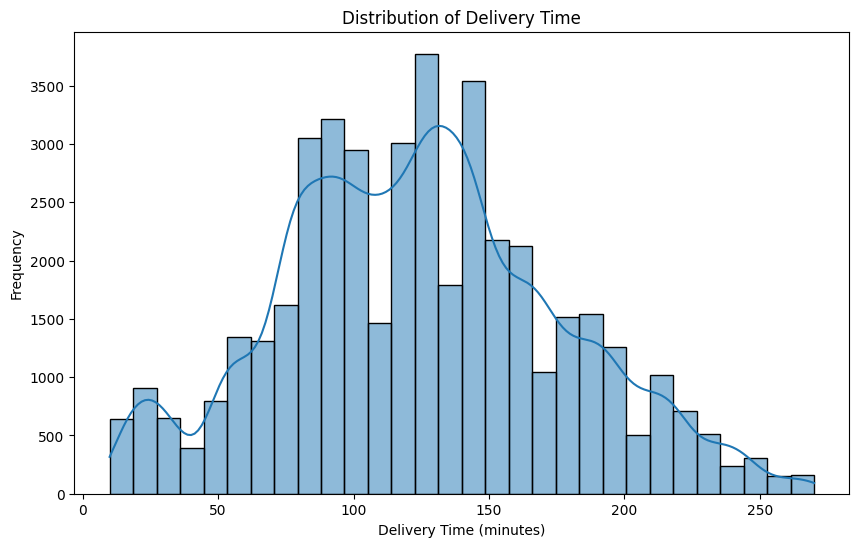

In [4]:
# Distribution of Delivery Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_Time'], kde=True, bins=30)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

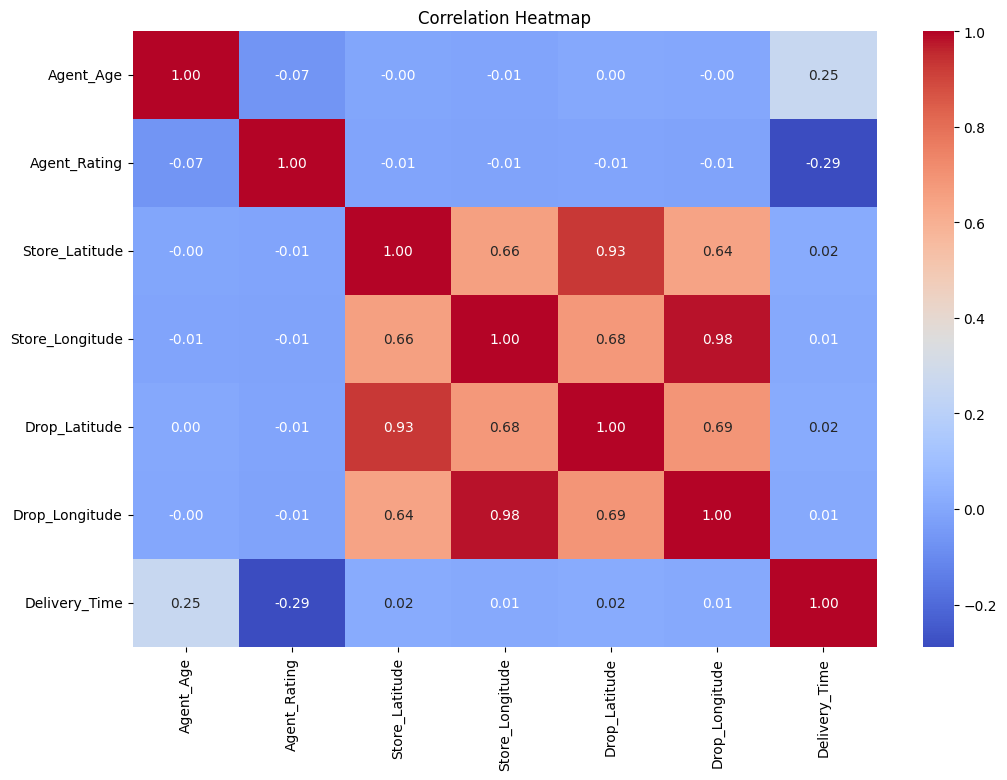

In [5]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Building a Predictive Model

Based on our EDA, it seems like we have enough features to build a predictive model for delivery time. Let's use a linear regression model for this purpose.

In [6]:
# Prepare the data for modeling
X = df[['Agent_Age', 'Agent_Rating', 'Store_Latitude', 'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude']]
y = df['Delivery_Time']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2297.326268446208
R-squared: 0.13762019169738104
